# **Import Libraries**

In [227]:
from google.colab import drive
import random
from zipfile import ZipFile
import shutil
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **Setups For Plots**

In [193]:
plt.style.use('dark_background')

# **DataSet**

In [194]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **UnZipping Folde**

In [195]:
zip_file=ZipFile('/content/drive/MyDrive/TeethDataSet/Copy of Teeth DataSet.zip','r')
zip_file.extractall('/content/dataset')
zip_file.close()

## **Training**

In [196]:
training_images_path=[]
training_folder_path='/content/dataset/Teeth_Dataset/Training'

In [197]:
training_categories=os.listdir(training_folder_path)
training_categories_distribution=[]

In [198]:
for category in training_categories:
  category_path=os.path.join(training_folder_path,category )
  training_categories_distribution.append(len(os.listdir(category_path)))
  for image in os.listdir(category_path):
    training_images_path.append(os.path.join(category_path,image))

### **Visualization**

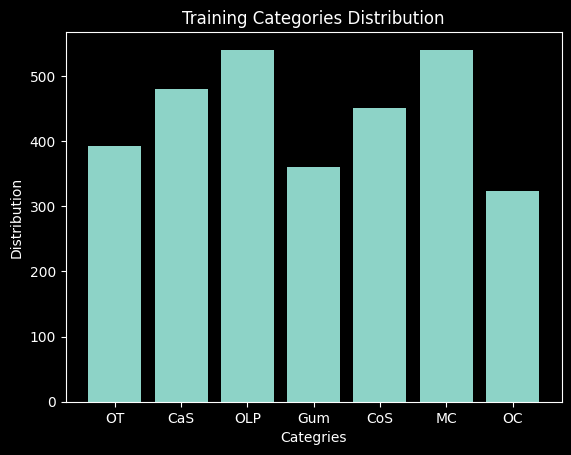

In [199]:
plt.bar(training_categories,training_categories_distribution)
plt.xlabel('Categries' )
plt.ylabel('Distribution')
plt.title('Training Categories Distribution')
plt.show()

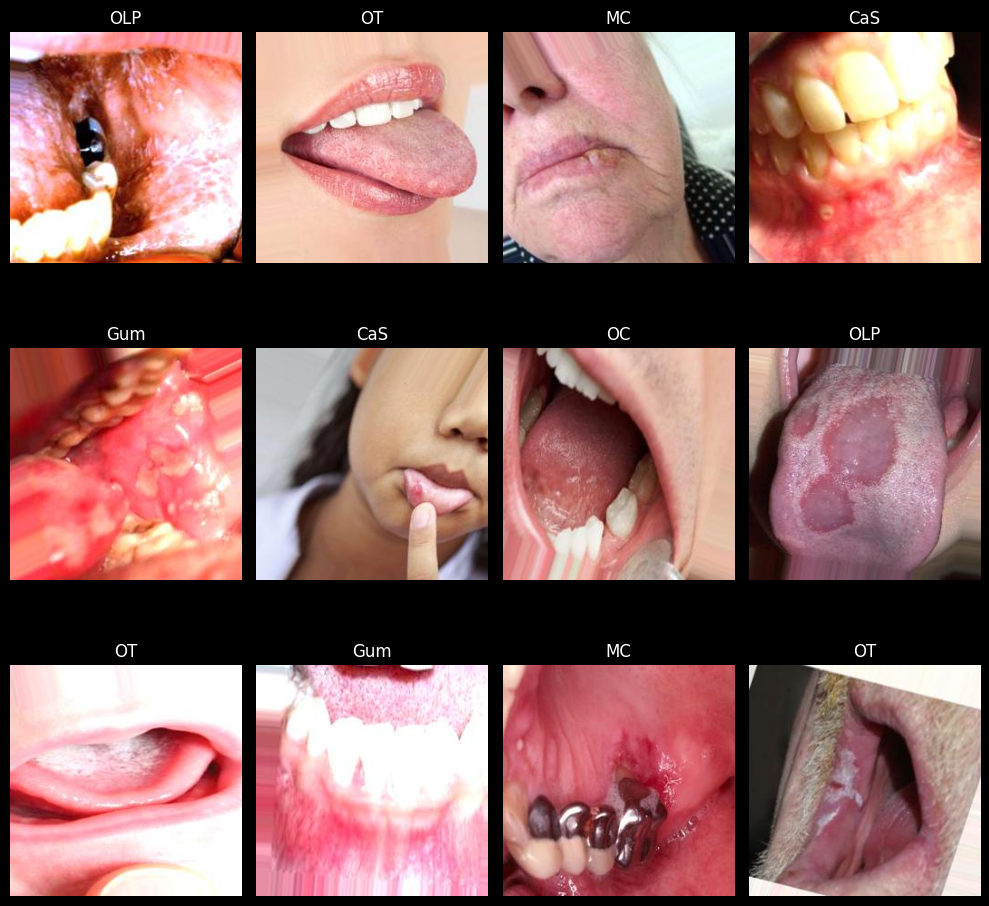

In [200]:
plt.figure(figsize=(10, 10))
for index in range(12):
  ax=plt.subplot(3,4,index+1)
  i=random.choice(range(len(training_images_path )))
  image=plt.imread(training_images_path[i])
  plt.imshow(image)
  plt.title(training_images_path[i].split('/')[-2])
  plt.axis('off')
plt.tight_layout()
plt.show()

## **Validation**

In [201]:
val_images_path=[]
val_folder_path='/content/dataset/Teeth_Dataset/Validation'

In [202]:
val_categories=os.listdir(val_folder_path)
val_categories_distribution=[]

In [203]:
for category in val_categories:
  category_path=os.path.join(val_folder_path,category )
  val_categories_distribution.append(len(os.listdir(category_path)))
  for image in os.listdir(category_path):
    val_images_path.append(os.path.join(category_path,image))

### **Visualization**

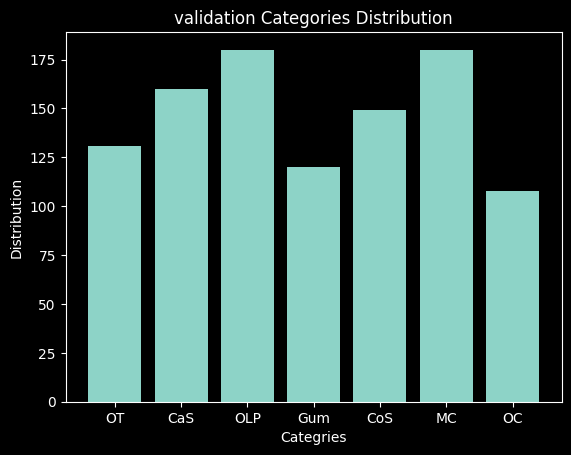

In [204]:
plt.bar(val_categories,val_categories_distribution)
plt.xlabel('Categries' )
plt.ylabel('Distribution')
plt.title('validation Categories Distribution')
plt.show()

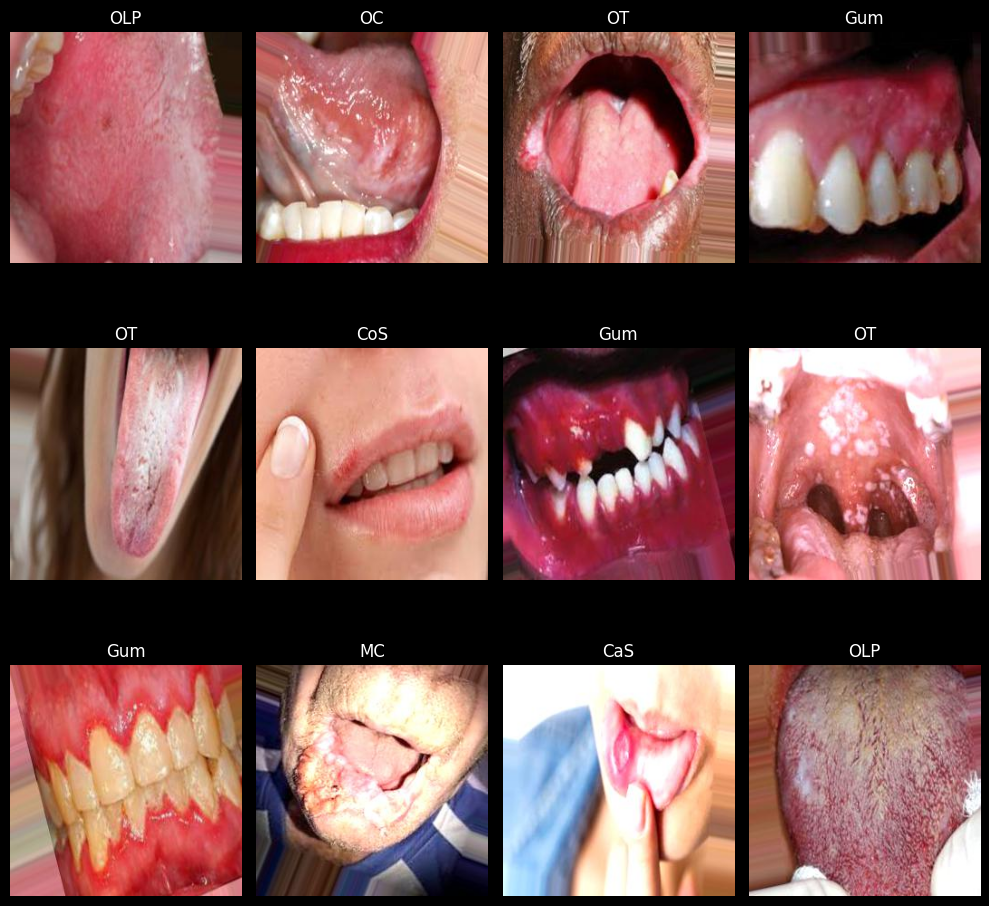

In [205]:
plt.figure(figsize=(10, 10))
for index in range(12):
  ax=plt.subplot(3,4,index+1)
  i=random.choice(range(len(val_images_path )))
  image=plt.imread(val_images_path[i])
  plt.imshow(image)
  plt.title(val_images_path[i].split('/')[-2])
  plt.axis('off')
plt.tight_layout()
plt.show()

## **Testing**

In [206]:
testing_folder_path = '/content/dataset/Teeth_Dataset/Testing'
testing_images_path =[]

### **Keep only categories**

In [207]:
folders_to_keep = ['OT', 'MC', 'CaS', 'CoS', 'OC', 'Gum', 'OLP']

for item in os.listdir(testing_folder_path):
    item_path = os.path.join(testing_folder_path, item)

    if os.path.isdir(item_path) and item not in folders_to_keep:
        print(f"Removing unwanted folder: {item_path}")
        shutil.rmtree(item_path)
    elif os.path.isfile(item_path):
        print(f"Removing unwanted file: {item_path}")
        os.remove(item_path)

print("Unwanted items removed.")

Removing unwanted folder: /content/dataset/Teeth_Dataset/Testing/out
Removing unwanted folder: /content/dataset/Teeth_Dataset/Testing/output
Removing unwanted file: /content/dataset/Teeth_Dataset/Testing/output_image.jpg
Removing unwanted folder: /content/dataset/Teeth_Dataset/Testing/outputs
Unwanted items removed.


In [208]:
testing_categories = os.listdir(testing_folder_path)
testing_categories_distribution = []

In [209]:
for category in testing_categories:
  category_path = os.path.join(testing_folder_path, category)
  if os.path.isdir(category_path):
    testing_categories_distribution.append(len(os.listdir(category_path)))
    for image in os.listdir(category_path):
      testing_images_path.append(os.path.join(category_path, image))

### **Visualization**

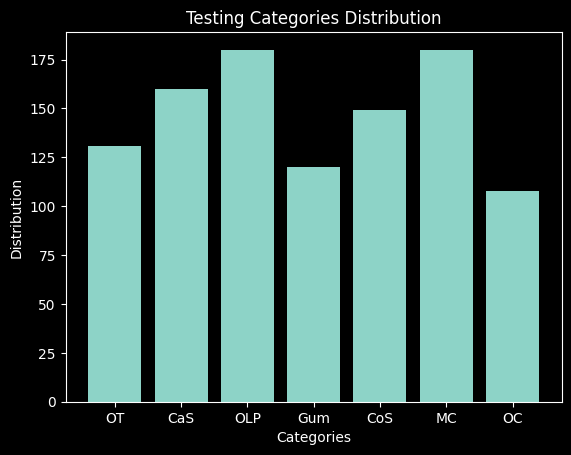

In [210]:
plt.bar(testing_categories, testing_categories_distribution)
plt.xlabel('Categories')
plt.ylabel('Distribution')
plt.title('Testing Categories Distribution')
plt.show()

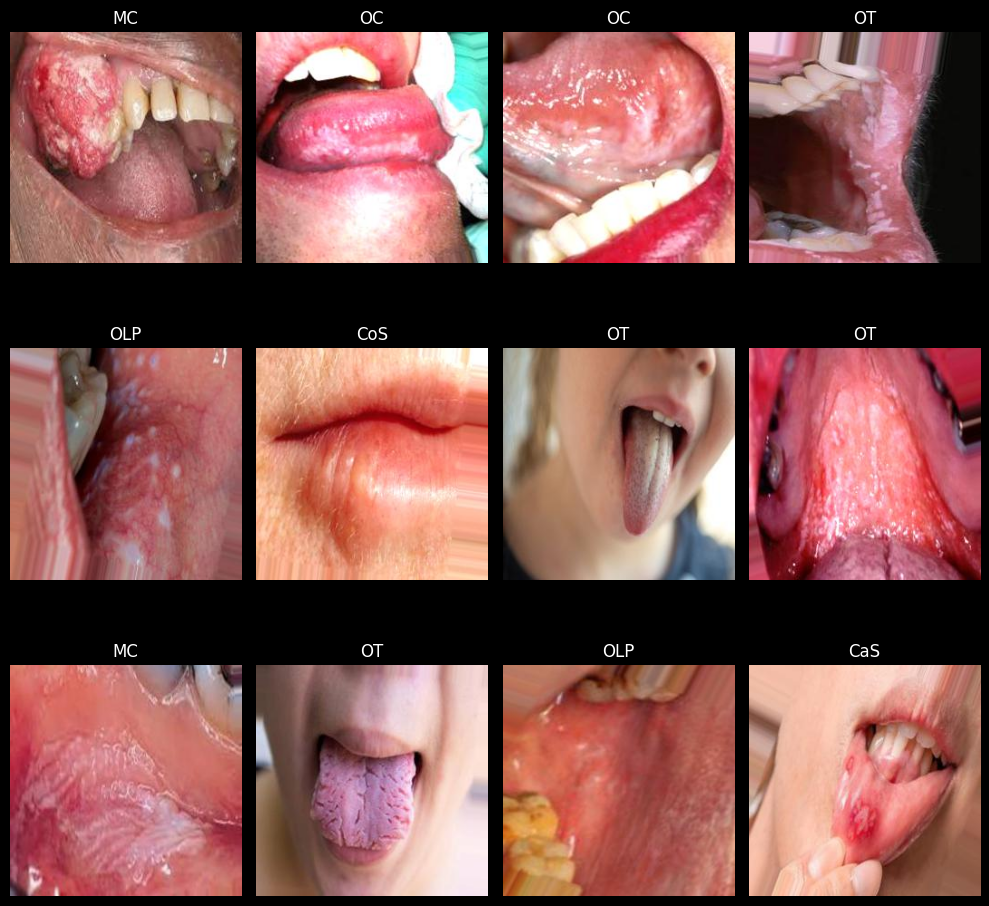

In [211]:
plt.figure(figsize=(10, 10))
for index in range(12):
  ax = plt.subplot(3, 4, index + 1)
  i = random.choice(range(len(testing_images_path)))
  image = plt.imread(testing_images_path[i])
  plt.imshow(image)
  plt.title(testing_images_path[i].split('/')[-2])
  plt.axis('off')
plt.tight_layout()
plt.show()

# **Augmentatio**

## **Training**

In [212]:
training_generator=ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=20
)

In [213]:
training_data = training_generator.flow_from_directory(
        training_folder_path,
        target_size=(64, 64),
        batch_size=32,
        shuffle=True,
        class_mode='categorical')

Found 3087 images belonging to 7 classes.


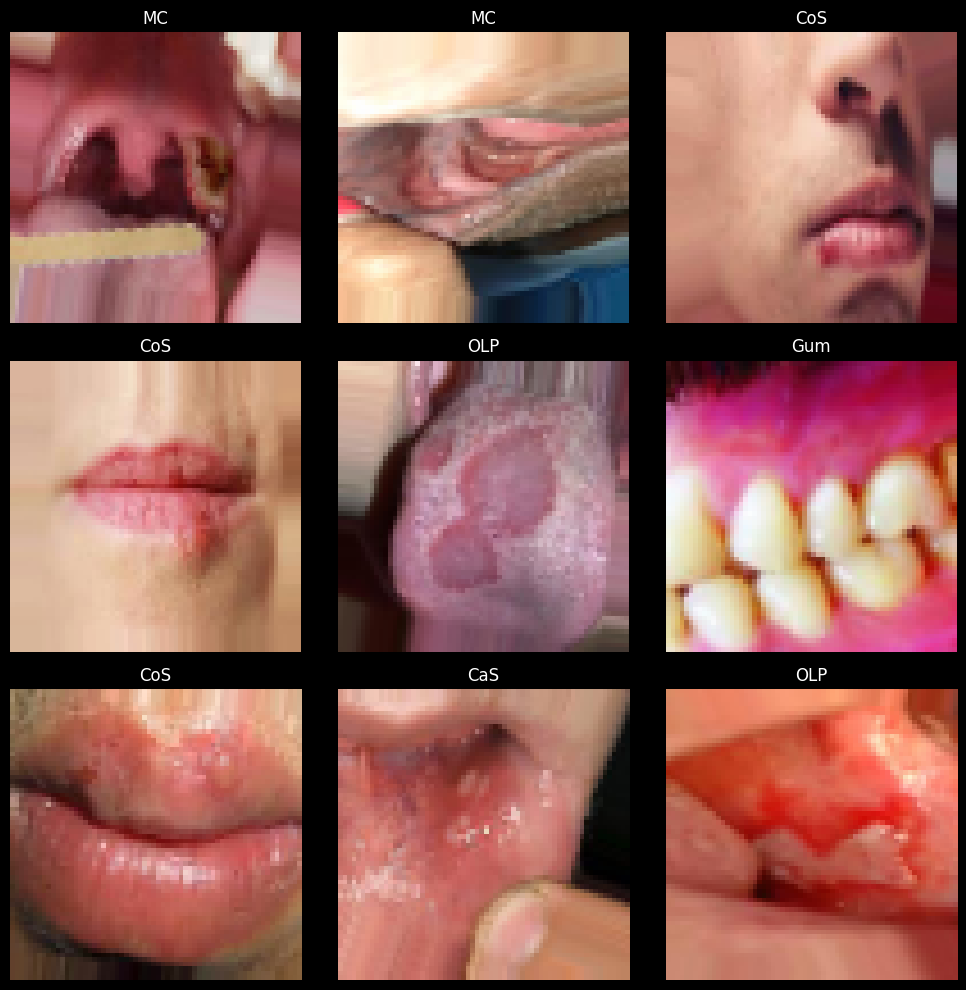

In [214]:
augmented_images, augmented_labels = next(training_data)

class_names = list(training_data.class_indices.keys())

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    predicted_class_index = np.argmax(augmented_labels[i])
    plt.title(class_names[predicted_class_index])
    plt.axis('off')
plt.tight_layout()
plt.show()

## **Validation**

In [215]:
val_generator=ImageDataGenerator(rescale=1./255)

In [216]:
val_data = val_generator.flow_from_directory(
        val_folder_path,
        batch_size=32,
        target_size=(64, 64),
        class_mode='categorical')


Found 1028 images belonging to 7 classes.


## **Testing**

In [217]:
test_generator=ImageDataGenerator(rescale=1./255)

In [231]:
test_data= test_generator.flow_from_directory(
    testing_folder_path,
    target_size=(64 ,64),
    batch_size=32,
    class_mode='categorical'
)

Found 1028 images belonging to 7 classes.


# **Model**

In [221]:
from tensorflow.keras.layers import GlobalAveragePooling2D

cnn = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=3, input_shape=[64, 64, 3], activation='relu'),
    Conv2D(filters=64, kernel_size=3, strides=3, activation='relu'),
    Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'),
    Conv2D(filters=256, kernel_size=3, strides=1, activation='relu'),

    GlobalAveragePooling2D(),

    Dense(units=100, activation='relu'),
    Dense(units=7, activation='softmax')
])

In [222]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 20, 20, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           707 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 416,359 (1.59 MB)

 Trainable params: 416,359 (1.59 MB)

 Non-trainable params: 0 (0.00 B)

In [223]:
cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [226]:
history=cnn.fit(x=training_data,validation_data=val_data,epochs=40)

Epoch 1/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.8009 - loss: 0.5449 - val_accuracy: 0.7588 - val_loss: 0.7133
Epoch 2/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.8270 - loss: 0.4806 - val_accuracy: 0.8035 - val_loss: 0.5431
Epoch 3/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - accuracy: 0.8387 - loss: 0.4676 - val_accuracy: 0.7938 - val_loss: 0.6085
Epoch 4/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - accuracy: 0.8418 - loss: 0.4855 - val_accuracy: 0.8103 - val_loss: 0.5016
Epoch 5/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.8696 - loss: 0.3796 - val_accuracy: 0.8346 - val_loss: 0.4593
Epoch 6/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.8856 - loss: 0.3282 - val_accuracy: 0.8551 - val_loss: 0.4317
Epoch 7/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.8777 - loss: 0.3552 - val_accuracy: 0.8434 - val_loss: 0.4253
Epoch 8/40
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.8949 - loss: 0.2928 - val_accu

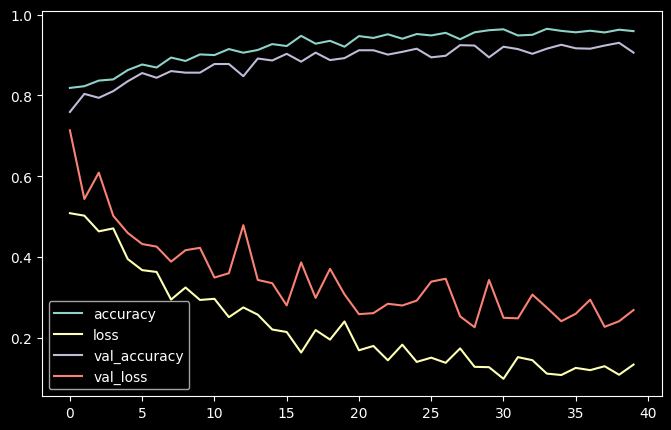

In [229]:
df= pd.DataFrame(history.history)
df.plot(figsize=(8,5))
plt.show()

In [232]:
cnn.evaluate(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9205 - loss: 0.2851


[0.28328707814216614, 0.9153696298599243]

In [234]:
cnn.save('/content/drive/MyDrive/TeethDataSet/model.h5')